In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
neuronas = np.power(25,2) #debe ser potencia de 2
neuronas_sqrt = np.sqrt(neuronas)
cambios = 25 #por neuronas
w = np.zeros([neuronas, neuronas])

for i in tqdm(range(neuronas)):
    for j in range(neuronas):
        if (i == j-1 and (j%neuronas_sqrt != 0)) or (i == j+1 and (i%neuronas_sqrt != 0)) or (i == j-neuronas_sqrt) or (i == j+neuronas_sqrt):
            w[i,j] = 1            
print(w)

100%|██████████| 625/625 [00:01<00:00, 539.82it/s]

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [44]:
h_ext = 0
k_boltzmann = 1
T = np.arange(10, 0, -0.1)
S = np.random.choice([1, -1], size=[1, neuronas])
S_medio = np.zeros([cambios * neuronas])
H = np.zeros([cambios * neuronas])
x = range(cambios * neuronas)

for k in tqdm(x):
    # computo h
    H[k] = -(1/2) * np.dot(S, np.dot(w, np.transpose(S))) - h_ext * np.sum(S)
    
    #elijo un subindice para crear un S auxiliar
    i = np.random.choice(np.arange(neuronas))
    S_aux = np.copy(S)
    S_aux[0, i] *= -1
    
    #calculo una h auxiliar
    H_aux = -(1/2) * np.dot(S_aux, np.dot(w, np.transpose(S_aux))) - h_ext * np.sum(S)
    
    #calculo la diferencia entre h y h_aux
    dH = (H_aux - H[k])    
    
    #me quedo con el S auxiliar si la energía nueva es menor
    if dH<0 :
        S = S_aux
        
    #sino, me quedo con la S auxiliar con una cierta probabilidad
    else :
        prob = np.power(np.e, (-dH)/(k_boltzmann * 1))
        if (random.random() < prob) :
            S = S_aux    
    
    #calculo la media de S
    S_medio[k] = np.mean(S)/neuronas

100%|██████████| 15625/15625 [00:20<00:00, 748.01it/s]


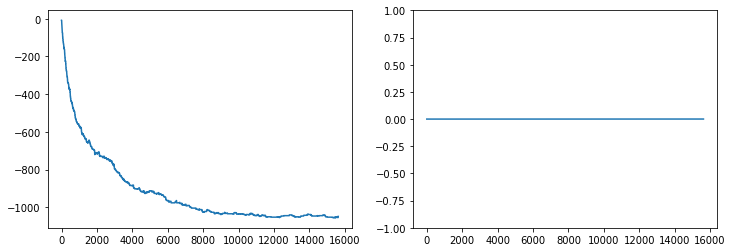

In [45]:
fig = plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.plot(x, H)
plt.subplot(1,2,2)
plt.plot(x, S_medio)
plt.ylim(-1, 1)
plt.show()